# Number Recognition

In [ ]:
# Data Collection

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

In [10]:
# Data Cleaning

In [7]:
# Prepare and clean the data
X_train = train_df.drop('label', axis=1).values.astype('float32')
y_train = train_df['label'].values.astype('int32')

X_test = test_df.drop('label', axis=1).values.astype('float32')
y_test = test_df['label'].values.astype('int32')

# Describe the data
print(train_df.describe())

# Check for null values
print(train_df.isnull().sum())

# Remove null values
train_df.dropna(inplace=True)

# Feature scaling
scaler = MinMaxScaler()
train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.transform(test_df)

# Convert back to DataFrames
train_df_scaled = pd.DataFrame(train_df_scaled, columns=train_df.columns)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df.columns)

              label      1x1      1x2      1x3      1x4      1x5      1x6  \
count  60000.000000  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       4.453933      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.889270      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           1x7      1x8      1x9  ...         28x19         28x20  \
count  60000.0  60000.0  60000.0  ...  60000.000000  60000.000000   
mean       0.0      0.0      0.0  ...      0.200433      0.088867   
std        0.0      0.0      0.0  ...      6.042472      3.956189   
min        0.0      0.0      0

In [ ]:
# Model Traing 

In [12]:
# Reshape the input data
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Model Training
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1200/1200 [==============================] - 40s 32ms/step - loss: 0.5073 - accuracy: 0.9284 - val_loss: 0.1176 - val_accuracy: 0.9656
Epoch 2/10
1200/1200 [==============================] - 38s 32ms/step - loss: 0.0802 - accuracy: 0.9761 - val_loss: 0.0938 - val_accuracy: 0.9733
Epoch 3/10
1200/1200 [==============================] - 40s 33ms/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0945 - val_accuracy: 0.9730
Epoch 4/10
1200/1200 [==============================] - 39s 33ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.1024 - val_accuracy: 0.9737
Epoch 5/10
1200/1200 [==============================] - 40s 33ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.1246 - val_accuracy: 0.9714
Epoch 6/10
1200/1200 [==============================] - 38s 32ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.1295 - val_accuracy: 0.9723
Epoch 7/10
1200/1200 [==============================] - 38s 32ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.1562 -

In [16]:
# Prepare the test data
X_test = test_df.drop('label', axis=1).values.astype('float32')
y_test = test_df['label'].values.astype('int32')

# Reshape the test data
X_test = X_test.reshape(-1, 28, 28, 1)

# Perform predictions on the test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with actual labels
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)


313/313 [==============================] - 3s 10ms/step
Accuracy: 0.9785


In [ ]:
# Model Evaluation and Visualization

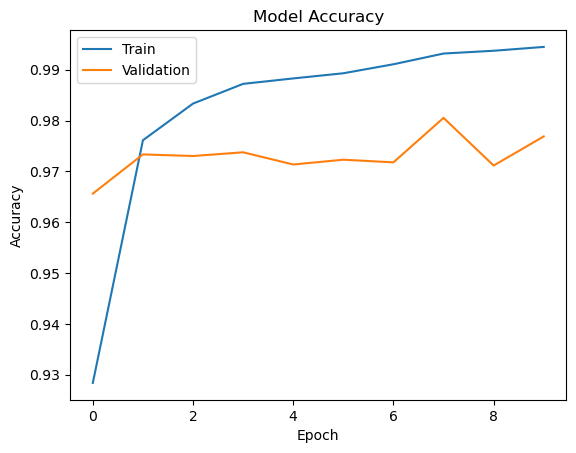

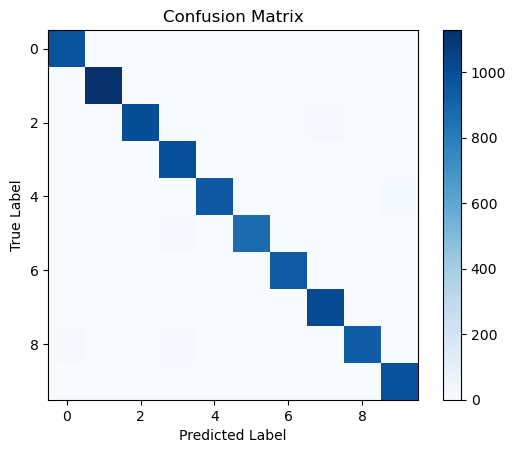

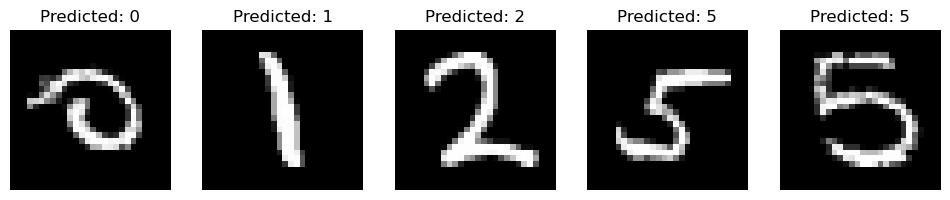

In [26]:
from sklearn.metrics import confusion_matrix

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


n_samples = 5
sample_indices = np.random.randint(0, len(X_test), n_samples)

fig, axes = plt.subplots(1, n_samples, figsize=(12, 4))

for i, index in enumerate(sample_indices):
    axes[i].imshow(X_test[index].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Predicted: {predicted_labels[index]}')
    axes[i].axis('off')

plt.show()

